In [126]:
import pandas as pd

In [127]:
data = pd.read_csv('ChurnData.csv')

In [128]:
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [129]:
data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [130]:
X = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless']].values

In [131]:
set(data.churn)

{0.0, 1.0}

In [132]:
data.churn = data.churn.astype('int')

In [133]:
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [134]:
from sklearn.cluster import DBSCAN

In [135]:
dbscan = DBSCAN(eps=6.5, min_samples=2)

In [136]:
import matplotlib.pyplot as plt

In [137]:
import numpy as np
colorset = np.array(['red','green','black'])


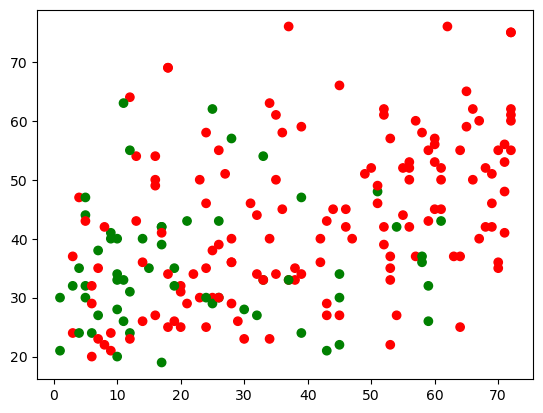

In [138]:
plt.scatter(X[:,0],X[:,1], c = colorset[data.churn])

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(X)

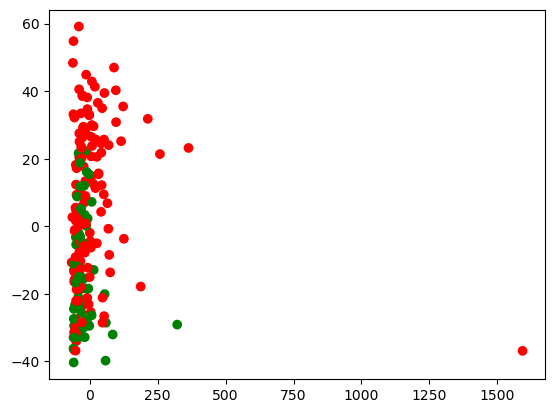

In [140]:
plt.scatter(x_new[:,0],x_new[:,1], c = colorset[data.churn])

In [141]:
data2  = pd.read_csv('cell_samples.csv')

In [142]:
data2.head(2)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [143]:
data2.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [144]:
X_cell_data = data2[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize'
       , 'BlandChrom', 'NormNucl', 'Mit']].values

In [145]:
pca = PCA(n_components=2)

In [146]:
X_cell_data_new = pca.fit_transform(X_cell_data)


In [147]:
set(data2.Class)

{2, 4}

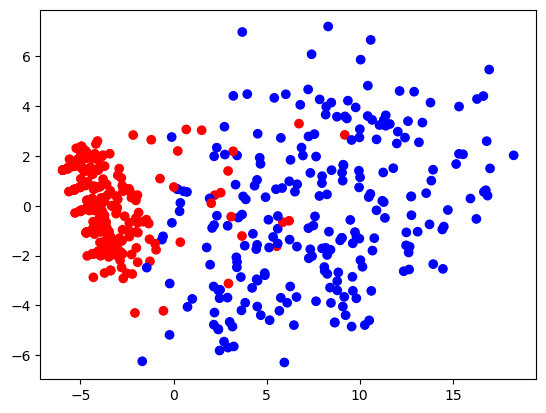

In [148]:
colorset = np.array(['_','_','red','_','blue','black'])
plt.scatter(X_cell_data_new[:,0],X_cell_data_new[:,1], c = colorset[data2.Class])

In [149]:
dbscan2 = DBSCAN(eps=0.5, min_samples=8)

In [150]:
DB = dbscan2.fit(X_cell_data_new)

In [151]:
set(DB.labels_)

{-1, 0, 1}

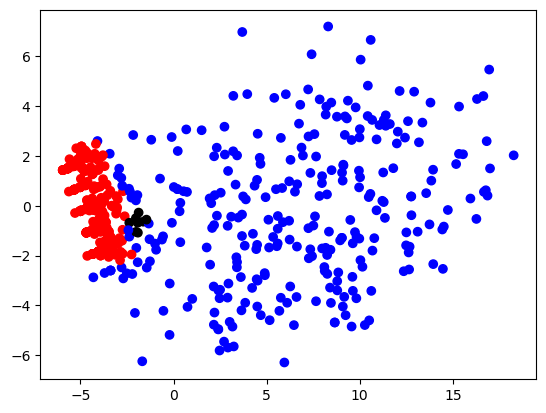

In [152]:
colorset2 = np.array(['red','black','blue'])
plt.scatter(X_cell_data_new[:,0],X_cell_data_new[:,1], c = colorset2[DB.labels_])